In [1]:
# Import required packages from Pytorch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

# fix random seed for reproducibility
import numpy as np
np.random.seed(7)

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda



Entraînement et évaluation de SqueezeNet...
Epoch [1/30]
Train Loss: 1.7052, Train Acc: 0.3543
Val Loss: 1.4269, Val Acc: 0.4655
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.2593, Train Acc: 0.5413
Val Loss: 1.1581, Val Acc: 0.5937
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.0378, Train Acc: 0.6275
Val Loss: 0.9883, Val Acc: 0.6464
--------------------------------------------------
Epoch [4/30]
Train Loss: 0.9164, Train Acc: 0.6708
Val Loss: 0.8795, Val Acc: 0.6811
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.8369, Train Acc: 0.7028
Val Loss: 0.9247, Val Acc: 0.6648
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.7768, Train Acc: 0.7273
Val Loss: 0.7962, Val Acc: 0.7191
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.7223, Train Acc: 0.7461
Val Loss: 0.7132, Val Acc: 0.7456
--------------------------------------------------
Epo

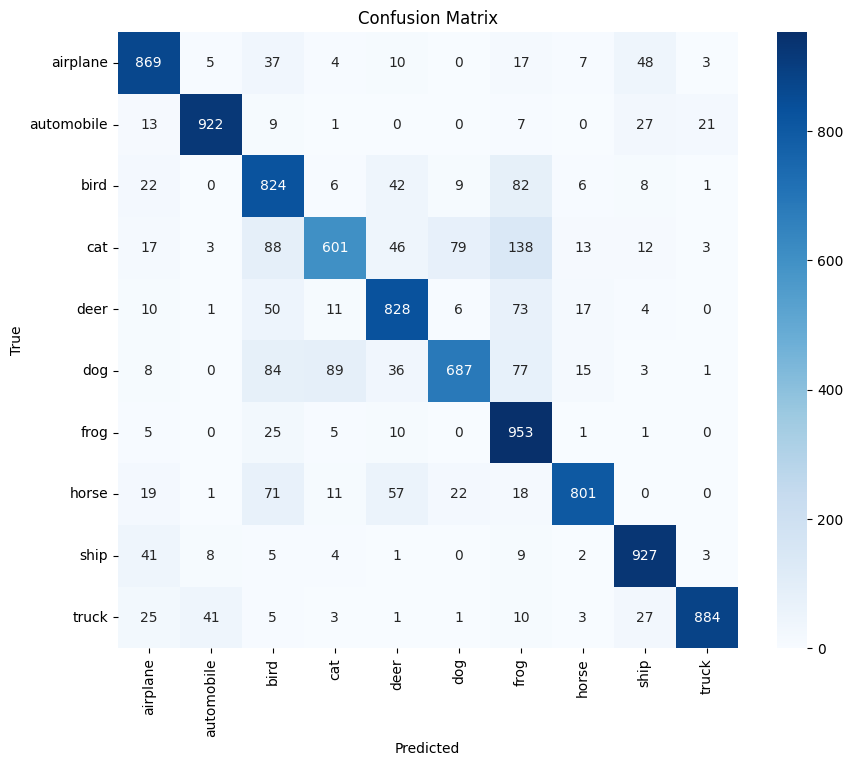

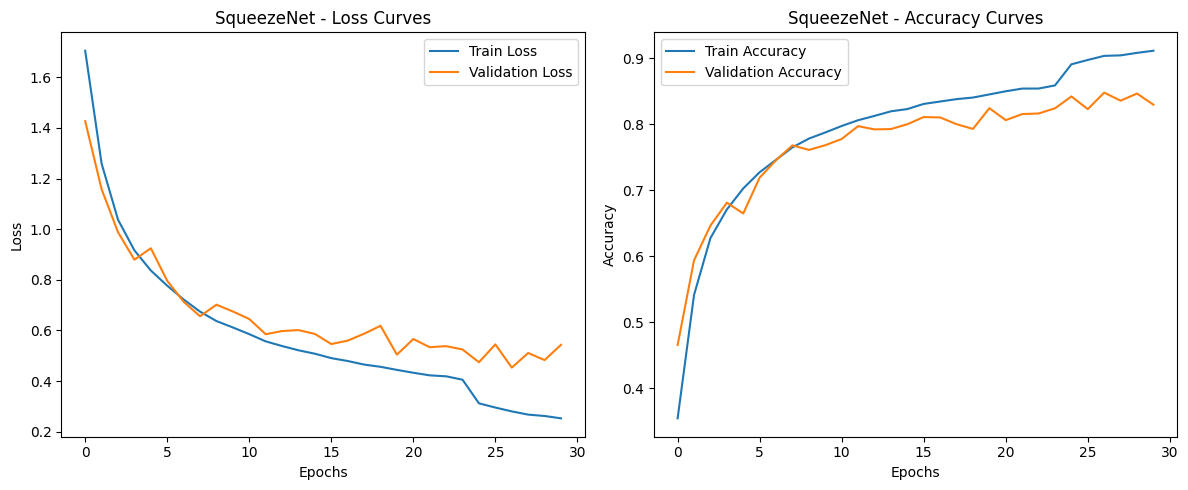


Entraînement et évaluation de SqueezeNet+SENet...
Epoch [1/30]
Train Loss: 1.5002, Train Acc: 0.4347
Val Loss: 1.2085, Val Acc: 0.5678
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.0362, Train Acc: 0.6272
Val Loss: 0.9344, Val Acc: 0.6644
--------------------------------------------------
Epoch [3/30]
Train Loss: 0.9140, Train Acc: 0.6733
Val Loss: 0.9223, Val Acc: 0.6633
--------------------------------------------------
Epoch [4/30]
Train Loss: 0.8299, Train Acc: 0.7077
Val Loss: 0.9029, Val Acc: 0.6698
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.7623, Train Acc: 0.7293
Val Loss: 0.7607, Val Acc: 0.7339
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.7030, Train Acc: 0.7545
Val Loss: 0.7342, Val Acc: 0.7419
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.6529, Train Acc: 0.7711
Val Loss: 0.6585, Val Acc: 0.7732
------------------------------------------------

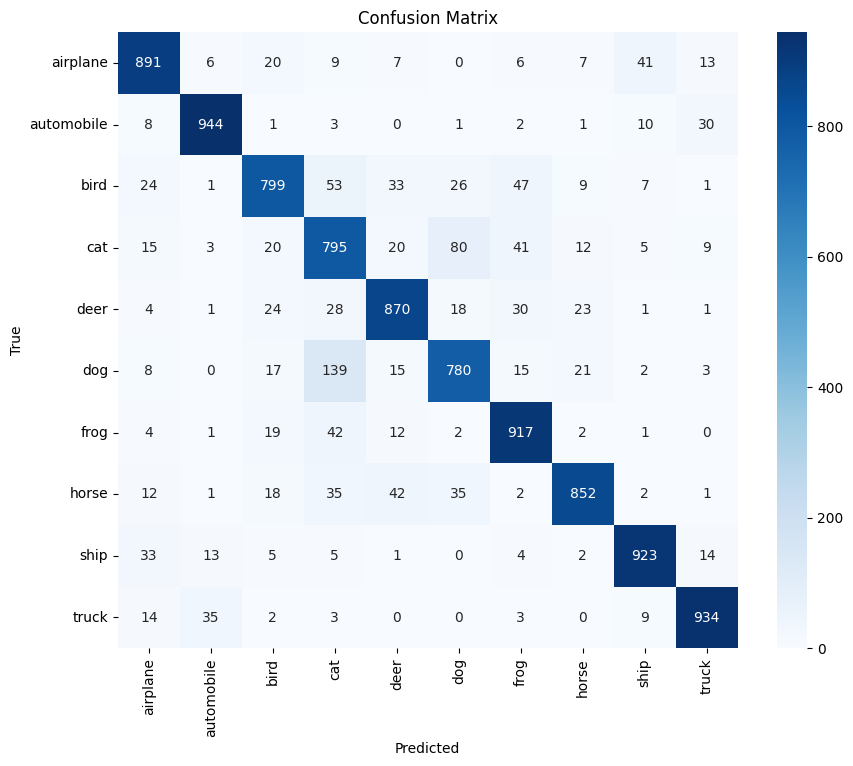

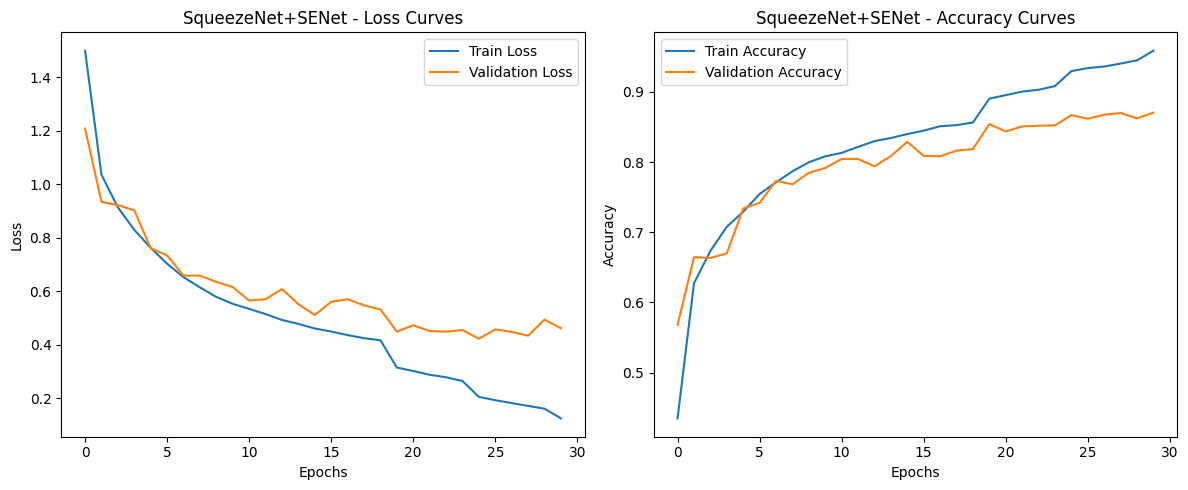


Entraînement et évaluation de SqueezeNet+CBAM...
Epoch [1/30]
Train Loss: 1.8204, Train Acc: 0.3092
Val Loss: 1.4234, Val Acc: 0.4670
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.1802, Train Acc: 0.5711
Val Loss: 1.0574, Val Acc: 0.6107
--------------------------------------------------
Epoch [3/30]
Train Loss: 0.9618, Train Acc: 0.6571
Val Loss: 1.0325, Val Acc: 0.6253
--------------------------------------------------
Epoch [4/30]
Train Loss: 0.8551, Train Acc: 0.6949
Val Loss: 0.8668, Val Acc: 0.6955
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.7673, Train Acc: 0.7284
Val Loss: 0.8008, Val Acc: 0.7143
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.6983, Train Acc: 0.7542
Val Loss: 0.6815, Val Acc: 0.7640
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.6504, Train Acc: 0.7733
Val Loss: 0.6986, Val Acc: 0.7587
-------------------------------------------------

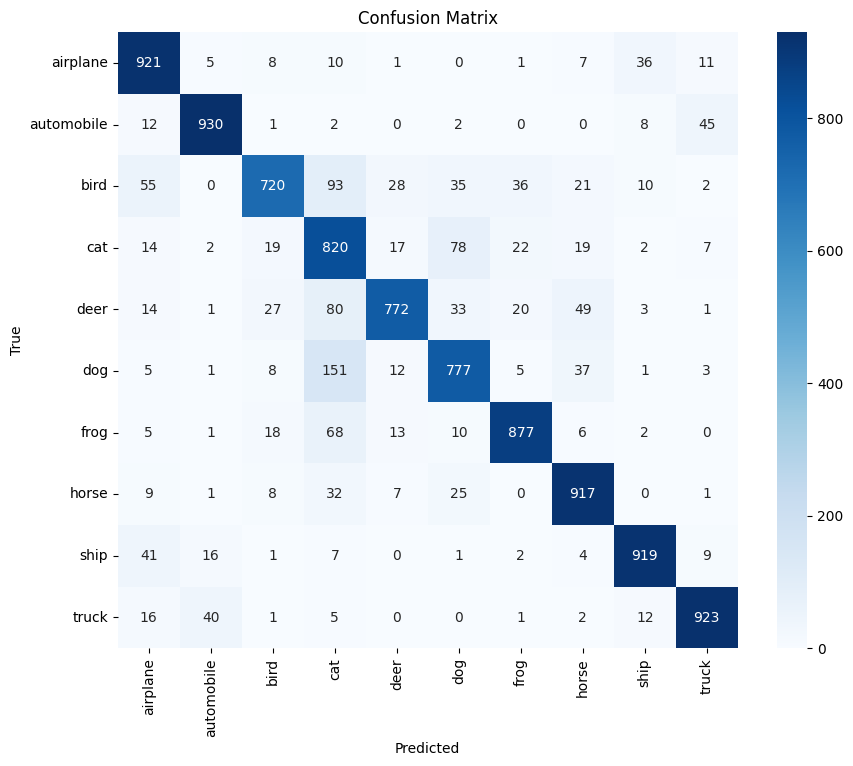

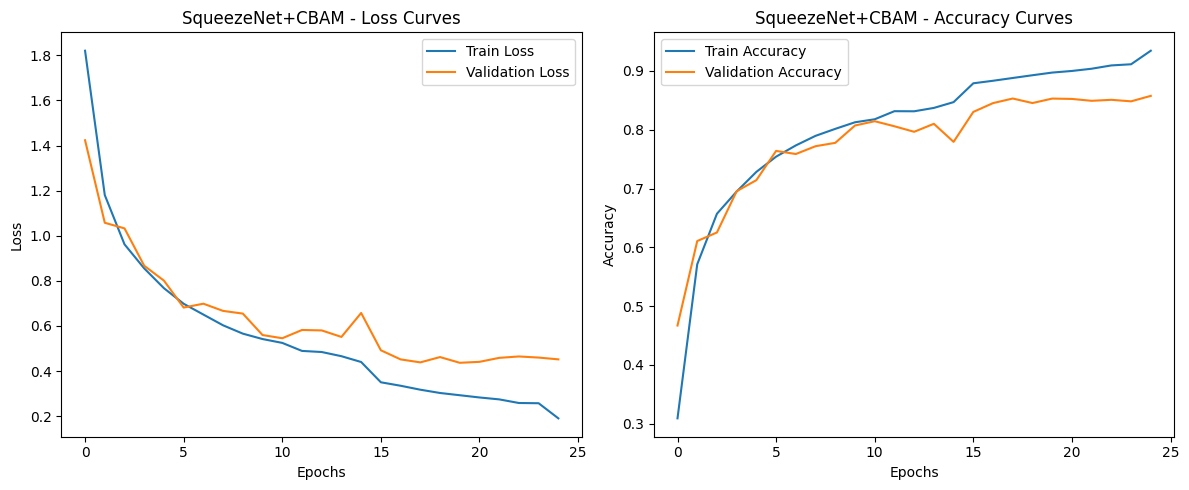


Entraînement et évaluation de SqueezeNet+CBAM+SENet...
Epoch [1/30]
Train Loss: 1.5174, Train Acc: 0.4360
Val Loss: 1.1439, Val Acc: 0.5819
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.0030, Train Acc: 0.6408
Val Loss: 1.0193, Val Acc: 0.6424
--------------------------------------------------
Epoch [3/30]
Train Loss: 0.8425, Train Acc: 0.7027
Val Loss: 0.9395, Val Acc: 0.6761
--------------------------------------------------
Epoch [4/30]
Train Loss: 0.7470, Train Acc: 0.7374
Val Loss: 0.7667, Val Acc: 0.7398
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.6720, Train Acc: 0.7680
Val Loss: 0.8047, Val Acc: 0.7289
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.6226, Train Acc: 0.7829
Val Loss: 0.6310, Val Acc: 0.7794
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.5763, Train Acc: 0.8016
Val Loss: 0.6251, Val Acc: 0.7891
-------------------------------------------

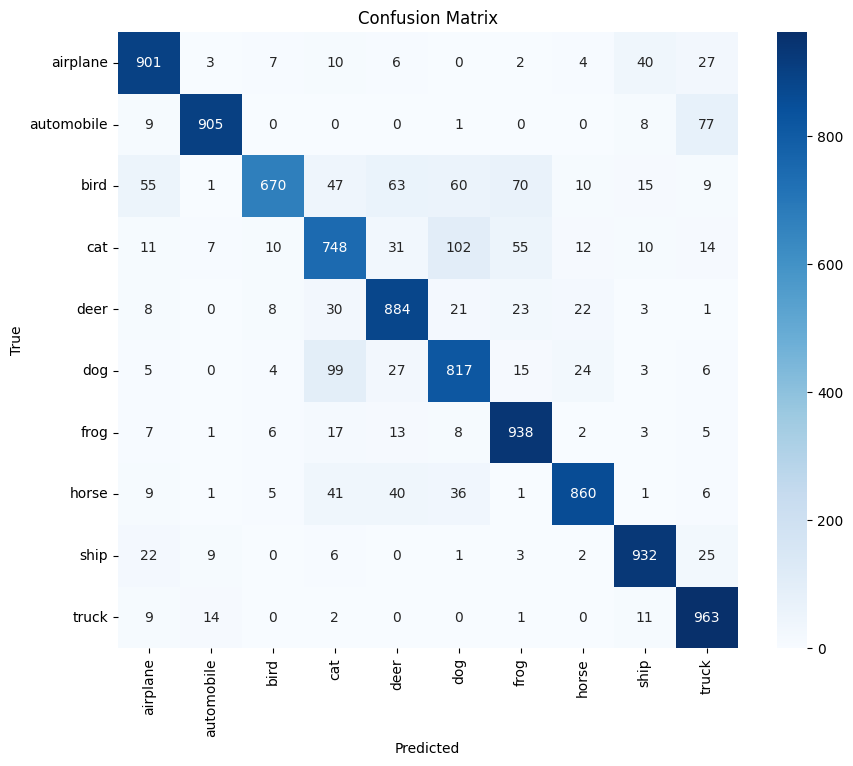

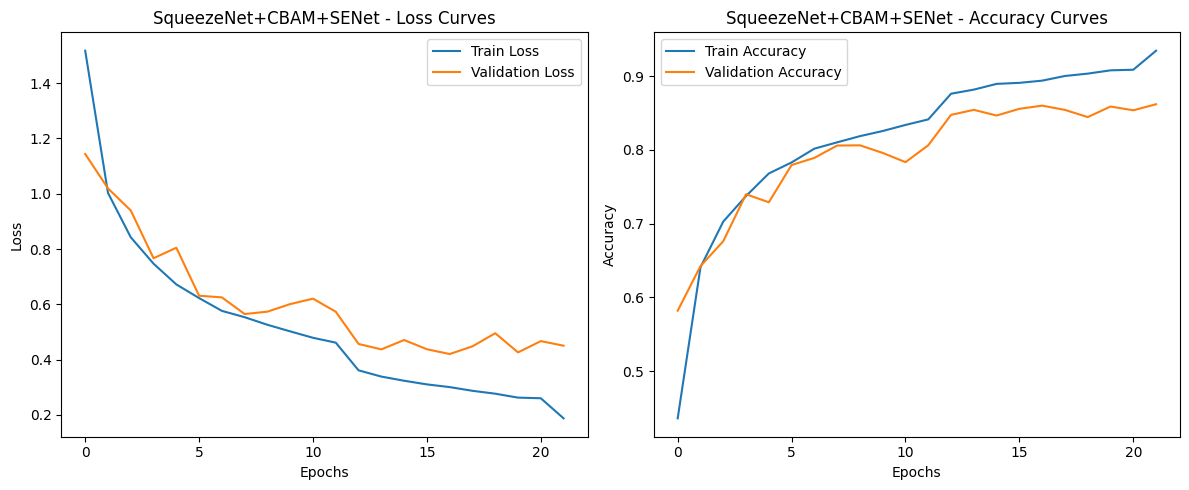

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Définir le device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Charger les données
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

class_names = trainset.classes

# Modules d'attention
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.global_avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class CBAMBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAMBlock, self).__init__()
        self.se_block = SEBlock(channels, reduction)
        self.spatial_att = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.se_block(x)
        max_pool = torch.max(x, dim=1, keepdim=True)[0]
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        spatial_att = torch.cat([max_pool, avg_pool], dim=1)
        spatial_att = self.spatial_att(spatial_att)
        return x * spatial_att.expand_as(x)

# Modification des modèles
def modify_model(base_model, model_name, use_senet=False, use_cbam=False):
    if model_name == "SqueezeNet":
        features = list(base_model.features.children())
        channels = 512  # Nombre de canaux dans la dernière couche de SqueezeNet
    else:
        raise ValueError("Modèle non supporté")
    
    new_layers = []
    for layer in features:
        new_layers.append(layer)
        if isinstance(layer, nn.Conv2d):
            if use_senet:
                new_layers.append(SEBlock(layer.out_channels))
            if use_cbam:
                new_layers.append(CBAMBlock(layer.out_channels))
    
    return nn.Sequential(
        nn.Sequential(*new_layers),
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Linear(channels, 10)  # 10 classes pour CIFAR-10
    ).to(device)

# Initialisation des modèles
models_dict = {
    "SqueezeNet": modify_model(models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.DEFAULT), "SqueezeNet"),
    "SqueezeNet+SENet": modify_model(models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.DEFAULT), "SqueezeNet", use_senet=True),
    "SqueezeNet+CBAM": modify_model(models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.DEFAULT), "SqueezeNet", use_cbam=True),
    "SqueezeNet+CBAM+SENet": modify_model(models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.DEFAULT), "SqueezeNet", use_senet=True, use_cbam=True),
}

# Fonction d'entraînement avec validation et suivi des métriques
def train_model_with_validation(model, trainloader, testloader, criterion, optimizer, scheduler, epochs=30, patience=5):
    model.train()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = float('inf')
    trigger_times = 0  # Compteur pour Early Stopping
    
    for epoch in range(epochs):
        # Phase d'entraînement
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(trainloader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Phase de validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(testloader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Affichage des métriques
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        print("-" * 50)

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0  # Réinitialiser le compteur
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping triggered!")
                break  # Arrêter l'entraînement
        
        # Réduction du taux d'apprentissage
        scheduler.step(val_loss)
    
    return train_losses, val_losses, train_accuracies, val_accuracies, all_preds, all_labels

# Fonction pour afficher les métriques de classification
def print_classification_metrics(all_labels, all_preds, class_names):
    print("\nClassification Metrics:")
    print(f"Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
    print(f"Precision: {precision_score(all_labels, all_preds, average='macro'):.4f}")
    print(f"Recall: {recall_score(all_labels, all_preds, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(all_labels, all_preds, average='macro'):.4f}")
    
    # Matrice de confusion
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies, model_name):
    plt.figure(figsize=(12, 5))
    
    # Courbes de perte
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Courbes d'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Entraînement et évaluation des modèles
criterion = nn.CrossEntropyLoss()
epochs = 30
patience = 5
results = {}

for name, model in models_dict.items():
    print(f"\nEntraînement et évaluation de {name}...")

    # Optimiseur avec Weight Decay
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Scheduler pour réduire le taux d'apprentissage
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
    
    # Entraînement avec validation
    train_losses, val_losses, train_accuracies, val_accuracies, all_preds, all_labels = train_model_with_validation(
        model, trainloader, testloader, criterion, optimizer, scheduler, epochs, patience)
    
    # Stocker les résultats
    results[name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'predictions': all_preds,
        'labels': all_labels
    }
    
    # Affichage des métriques de classification
    print_classification_metrics(all_labels, all_preds, class_names)
    
    # Tracer les courbes d'apprentissage
    plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies, name)